In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [3]:
image_size = 64
image_shape = (image_size,image_size,3)

In [5]:
base_model = keras.applications.VGG16(input_shape = image_shape,
                                     include_top = False,
                                      weights = 'imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
base_model.trainable = False

In [7]:
maxpool_layers = keras.layers.GlobalMaxPool2D()

In [8]:
prediction_layer = keras.layers.Dense(1,activation='sigmoid')

In [9]:
classifier = keras.Sequential([base_model,maxpool_layers,prediction_layer])

In [11]:
classifier.compile(optimizer=keras.optimizers.Adam(),loss = 'binary_crossentropy',metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_dataset = ImageDataGenerator(rescale=1.0/255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [14]:
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [33]:
train_set = train_dataset.flow_from_directory('dataset/training_set',
                                               target_size=(64,64),
                                               batch_size=6,
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [34]:
label_map = train_set.class_indices
label_map

{'cats': 0, 'dogs': 1}

In [35]:
test_set = test_datagen.flow_from_directory('dataset/test_set',target_size = (64,64),
                                           batch_size = 6, class_mode = 'binary')

Found 38 images belonging to 2 classes.


In [22]:
classifier.fit_generator(train_set,steps_per_epoch=100,
                        epochs = 10,validation_data = test_set,validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 43s 427ms/step - loss: 0.6675 - acc: 0.5751 - val_loss: 0.6840 - val_acc: 0.6618
Epoch 2/10
100/100 [==============================] - 39s 390ms/step - loss: 0.5763 - acc: 0.7350 - val_loss: 0.6239 - val_acc: 0.7353
Epoch 3/10
100/100 [==============================] - 38s 377ms/step - loss: 0.5195 - acc: 0.7917 - val_loss: 0.5999 - val_acc: 0.7059
Epoch 4/10
100/100 [==============================] - 38s 380ms/step - loss: 0.4899 - acc: 0.8217 - val_loss: 0.6000 - val_acc: 0.6838
Epoch 5/10
100/100 [==============================] - 37s 374ms/step - loss: 0.4622 - acc: 0.8333 - val_loss: 0.5608 - val_acc: 0.7426
Epoch 6/10
100/100 [==============================] - 38s 379ms/step - loss: 0.4378 - acc: 0.8499 - val_loss: 0.5692 - val_acc: 0.7022
Epoch 7/10
100/100 [==============================] - 42s 420ms/step - loss: 0.4053 - acc: 0.8566 - val_loss: 0.5616 - val_acc: 0.6828
Epoch 8

In [28]:
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('dataset/single_prediction/cat2.jpg'
                           ,target_size =(64,64))

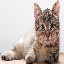

In [29]:
test_image

In [30]:
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

In [31]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [32]:
prediction

'cat'